In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("all_apple_stock_data.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/04/2023,$181.99,115956800,$185.52,$187.38,$181.92
1,08/03/2023,$191.17,62243280,$191.57,$192.37,$190.69
2,08/02/2023,$192.58,50389330,$195.04,$195.18,$191.8507
3,08/01/2023,$195.605,35281430,$196.235,$196.73,$195.28
4,07/31/2023,$196.45,38824110,$196.06,$196.49,$195.26


In [4]:
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [5]:
# Extracts the values from the "Open" column of the DataFrame df and creates a new NumPy array.
# The resulting array will contain only the values from the "Open" column, without any row or column labels.
df1 = df[["Open"]].values
df1

array([['$185.52'],
       ['$191.57'],
       ['$195.04'],
       ['$196.235'],
       ['$196.06'],
       ['$194.67'],
       ['$196.02'],
       ['$193.67'],
       ['$193.33'],
       ['$193.41'],
       ['$194.10'],
       ['$195.09'],
       ['$193.10'],
       ['$193.35'],
       ['$191.90'],
       ['$190.23'],
       ['$190.50'],
       ['$189.68'],
       ['$189.16'],
       ['$189.26'],
       ['$191.41'],
       ['$189.84'],
       ['$191.565'],
       ['$193.78'],
       ['$191.63'],
       ['$189.08'],
       ['$187.93'],
       ['$185.89'],
       ['$186.83'],
       ['$185.55'],
       ['$183.74'],
       ['$184.90'],
       ['$184.41'],
       ['$186.73'],
       ['$183.96'],
       ['$183.37'],
       ['$182.80'],
       ['$181.27'],
       ['$181.50'],
       ['$177.895'],
       ['$178.44'],
       ['$179.965'],
       ['$182.63'],
       ['$181.03'],
       ['$177.70'],
       ['$177.325'],
       ['$176.96'],
       ['$173.32'],
       ['$172.41'],
       ['$171.0

In [6]:
# Replace function to remove dollar sign/commas from values in the "Open" column.
# The `regex=True` argument enables the use of regular expressions for matching the characters to replace.
# The resulting modified values are then converted to floating-point numbers using `astype(float)`.

df1 = df["Open"].replace({'\$': '', ',':''}, regex=True).astype(float)

# The modified values are stored in the df1 variable.
df1

0      185.520
1      191.570
2      195.040
3      196.235
4      196.060
        ...   
120    149.460
121    153.775
122    153.880
123    150.640
124    152.575
Name: Open, Length: 125, dtype: float64

In [7]:
print(df1.shape)

(125,)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1));df1

array([[0.79336612],
       [0.9100376 ],
       [0.97695497],
       [1.        ],
       [0.9966252 ],
       [0.96981969],
       [0.99585382],
       [0.95053515],
       [0.9439784 ],
       [0.94552116],
       [0.9588275 ],
       [0.9779192 ],
       [0.93954296],
       [0.94436409],
       [0.9164015 ],
       [0.88419632],
       [0.88940314],
       [0.87358982],
       [0.86356186],
       [0.86549031],
       [0.90695208],
       [0.87667534],
       [0.90994118],
       [0.95265645],
       [0.91119468],
       [0.86201909],
       [0.83984187],
       [0.8005014 ],
       [0.81862887],
       [0.79394465],
       [0.75903963],
       [0.7814097 ],
       [0.77196027],
       [0.81670041],
       [0.76328223],
       [0.75190435],
       [0.74091216],
       [0.71140681],
       [0.71584225],
       [0.64632147],
       [0.65683155],
       [0.68624048],
       [0.73763379],
       [0.70677852],
       [0.64256099],
       [0.63532928],
       [0.62829043],
       [0.558

In [9]:
num_of_prices = len(df1)
print(len(df1))

125


In [10]:
apple_price_features = [] #feature group input values-x's. We are going to fit our x's(independent variable)
apple_price_labels = [] #label group output values-x's. We are going to fit out y (dependent variable)
for i in range (10, (num_of_prices)):
    apple_price_features.append(df1[i-10:i, 0])# the feature values b/w 0-9 of df1 scaled grouping. makes group of 10
    apple_price_labels.append(df1[i, 0])# 1 number for 10 inputs or 1 output for 10 outputs. produces only one 
    #value of y -> one value each of 10 prices.
    

In [11]:
# Create training data for a machine learning model using a subset of the data.

# Create an array x_train containing the first 100 elements of the 'apple_price_features' array.
x_train = np.array(apple_price_features[0:100])

# Create an array y_train containing the corresponding first 100 elements of the 'apple_price_labels' array.
y_train = np.array(apple_price_labels[0:100])


In [12]:
print(x_train.shape)
print(y_train.shape)

(100, 10)
(100,)


In [28]:
# Prepare testing data for a machine learning model using the remaining data.

# Create an array x_test containing elements from index 101 to the end of the 'apple_price_features' array.
x_test = np.array(apple_price_features[101:])

# Create an array y_test containing elements from index 101 to the end of the 'apple_price_labels' array.
y_test = np.array(apple_price_labels[101:])

In [14]:
# Create an array x_test containing elements from index 101 to the end of the 'apple_price_features' array.
x_test = np.array(apple_price_features[101:])

# Create an array y_test containing elements from index 101 to the end of the 'apple_price_labels' array.
y_test = np.array(apple_price_labels[101:])

# Reshape x_test to match the input shape expected by the sequence-based model.
# The shape of x_test is modified to (number of samples, sequence length, number of features per time step).
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Print the shape of the modified x_test array.
print(x_test.shape)


(14, 10, 1)


In [15]:
# Keras -> have neural network models -> importing one such model
# tensorflow is an open source library developed by google -> for building Neural Network
# keras builds the layers of the Neural Network

In [16]:
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.models import Model

In [29]:
# Define the input layer with the shape of the training data (sequence length, number of features per time step).
input_layer = Input(shape=(x_train.shape[1], 1))

# Add a Long Short-Term Memory (LSTM) layer with 100 units, ReLU activation, and returning sequences.
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)

# Add a dropout layer to prevent overfitting by randomly deactivating 10% of the LSTM outputs.
drop1 = Dropout(0.1)(lstm1)

# Add another LSTM layer with 120 units, ReLU activation, and returning sequences.
lstm2 = LSTM(120, activation='relu', return_sequences=True)(drop1)

# Add another LSTM layer with 80 units, ReLU activation, and returning sequences.
lstm3 = LSTM(80, activation='relu', return_sequences=True)(lstm2)

# Add a final LSTM layer with 50 units and ReLU activation.
lstm4 = LSTM(50, activation='relu')(lstm3)

# Define the output layer with a single neuron for regression task.
output_layer = Dense(1)(lstm4)

# Create a model that takes the input and produces the output.
model = Model(input_layer, output_layer)

# Compile the model with the Adam optimizer and mean squared error (MSE) loss.
model.compile(optimizer='adam', loss='mse')

# Print a summary of the model architecture.
print(model.summary())

# Print the shapes of the training data arrays.
print(x_train.shape)
print(y_train.shape)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dropout_1 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 10, 120)           106080    
                                                                 
 lstm_6 (LSTM)               (None, 10, 80)            64320     
                                                                 
 lstm_7 (LSTM)               (None, 50)                26200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51  

In [18]:
# Train the model using x_train (input features) and y_train (target labels).
# Each training batch contains 20 samples.
# The training process runs for 100 epochs (iterations through the entire dataset).

# During training, also use the x_test (test input features) and y_test (test target labels) for validation.
# This helps monitor the model's performance on unseen data.

# The `verbose` parameter is set to 1, which displays training progress during each epoch.


model_history = model.fit(x_train, y_train, batch_size = 20, epochs = 100, validation_data = (x_test, y_test), verbose = 1,)

Epoch 1/100
5/5 [==============================] - 2s 87ms/step - loss: 0.3318 - val_loss: 0.0138
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2889 - val_loss: 0.0057
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1918 - val_loss: 0.0056
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0598 - val_loss: 0.0598
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0276 - val_loss: 0.0175
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0395 - val_loss: 0.0216
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0226 - val_loss: 0.0426
Epoch 8/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0193 - val_loss: 0.0248
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0160 - val_loss: 0.0122
Epoch 10/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0106 - val_loss: 0.0136
Epoch 11/100
5/5 [=

In [19]:
## Predict target labels (y_pred) for the test input features (x_test)
y_pred = model.predict(x_test)

# Print the shape of the predicted labels (y_pred).
# The shape indicates the dimensions of the array containing the predicted values.
print(y_pred.shape)

1/1 [==============================] - 0s 284ms/step
(14, 1)


In [20]:
#`inverse_transform` method to revert the scaling on the predicted labels (y_pred).
# This step is important to obtain the predictions in the original data range.

y_pred = scaler.inverse_transform(y_pred)

# Print the array of predicted labels after the inverse transformation.
print(y_pred)


[[146.27934]
 [147.76543]
 [147.15338]
 [146.9029 ]
 [145.33437]
 [142.79565]
 [142.0652 ]
 [143.0031 ]
 [143.32133]
 [143.77092]
 [144.0511 ]
 [145.20299]
 [145.18056]
 [146.16216]]


In [21]:
print(y_test.shape)

(14,)


In [22]:
# Reshaping the true target labels array (y_test) to have a single column.
y_test = y_test.reshape(-1,1)
# Using`inverse_transform` method to revert the scaling on the reshaped true target labels.
# bringing the true target labels back to their original data range.
y_test = scaler.inverse_transform(y_test)
print(y_test)

[[147.11 ]
 [150.09 ]
 [148.87 ]
 [150.2  ]
 [152.35 ]
 [153.51 ]
 [153.11 ]
 [152.12 ]
 [150.952]
 [149.46 ]
 [153.775]
 [153.88 ]
 [150.64 ]
 [152.575]]


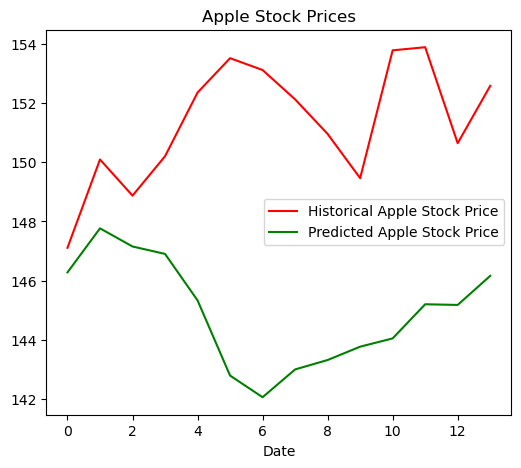

In [23]:
plt.figure(figsize=(6,5))
plt.plot(y_test, color = 'red', label = "Historical Apple Stock Price")
plt.plot(y_pred, color = 'green', label = "Predicted Apple Stock Price")
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.legend()
plt.show()

In [24]:
new_array = np.array([142, 141, 140, 144, 146, 148, 149, 149, 148])
new_array = new_array.reshape(-1,1)
print(new_array)
print(new_array.shape)

[[142]
 [141]
 [140]
 [144]
 [146]
 [148]
 [149]
 [149]
 [148]]
(9, 1)


In [25]:
new_array_scaled = scaler.fit_transform(new_array)
new_array_scaled = np.reshape(new_array_scaled, (1,9,1))
print(new_array_scaled.shape)
print(new_array_scaled)

(1, 9, 1)
[[[0.22222222]
  [0.11111111]
  [0.        ]
  [0.44444444]
  [0.66666667]
  [0.88888889]
  [1.        ]
  [1.        ]
  [0.88888889]]]


In [26]:
new_pred = model.predict(new_array_scaled)

1/1 [==============================] - 0s 260ms/step


In [27]:
new_pred = scaler.inverse_transform(new_pred)
print("We predict the price of the Apple stock will be: ")
print(*new_pred[0])

We predict the price of the Apple stock will be: 
141.27846
